In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [21]:
projdir = '/u/home/t/terencew/project-cluo/igvf/pilot/multiome/'

donors = list(np.loadtxt(f'{projdir}/txt/donors.txt', dtype=str))
samples = list(np.loadtxt(f'{projdir}/txt/samples.txt', dtype=str))
s = samples[0]

gex_methods = pd.Index(['demuxlet', 'freemuxlet',  'vireo', 'vireo_nogenos',
    'souporcell', 'souporcell_nogenos', 'scsplit', 'scsplit_nogenos', 'demuxalot'])
atac_methods = pd.Index(['demuxlet', 'freemuxlet',  'vireo', 'vireo_nogenos',
    'souporcell', 'souporcell_nogenos', 'scsplit', 'scsplit_nogenos', 'scavengers'])

doub_experiments = np.loadtxt(f'{projdir}/ambient/ambisim/cov_doub_test/txt/experiments.txt', dtype=str)
mux_experiments = np.loadtxt(f'{projdir}/ambient/ambisim/cov_mux_test/txt/experiments.txt', dtype=str)

In [22]:
doub_gex = pd.read_csv(f'{projdir}/csv/ambisim/cov_doub_test/ambisim_gex.csv.gz', sep='\t', header=0, index_col=0)
doub_atac = pd.read_csv(f'{projdir}/csv/ambisim/cov_doub_test/ambisim_atac.csv.gz', sep='\t', header=0, index_col=0)
mux_gex = pd.read_csv(f'{projdir}/csv/ambisim/cov_mux_test/ambisim_gex.csv.gz', sep='\t', header=0, index_col=0)
mux_atac = pd.read_csv(f'{projdir}/csv/ambisim/cov_mux_test/ambisim_atac.csv.gz', sep='\t', header=0, index_col=0)

In [23]:
### getting droplet type column
doub_gex['droplet_type'] = doub_gex['donor_id'].copy()
doub_gex_mask = (doub_gex['droplet_type'] == 'doublet') | (doub_gex['droplet_type'] == 'unassigned')
doub_gex.loc[doub_gex_mask, 'droplet_type'] = 'non_singlet'
doub_gex.loc[~doub_gex_mask, 'droplet_type'] = 'singlet'

doub_atac['droplet_type'] = doub_atac['donor_id'].copy()
doub_atac_mask = (doub_atac['droplet_type'] == 'doublet') | (doub_atac['droplet_type'] == 'unassigned')
doub_atac.loc[doub_atac_mask, 'droplet_type'] = 'non_singlet'
doub_atac.loc[~doub_atac_mask, 'droplet_type'] = 'singlet'

mux_gex['droplet_type'] = mux_gex['donor_id'].copy()
mux_gex_mask = (mux_gex['droplet_type'] == 'doublet') | (mux_gex['droplet_type'] == 'unassigned')
mux_gex.loc[mux_gex_mask, 'droplet_type'] = 'non_singlet'
mux_gex.loc[~mux_gex_mask, 'droplet_type'] = 'singlet'

mux_atac['droplet_type'] = mux_atac['donor_id'].copy()
mux_atac_mask = (mux_atac['droplet_type'] == 'doublet') | (mux_atac['droplet_type'] == 'unassigned')
mux_atac.loc[mux_atac_mask, 'droplet_type'] = 'non_singlet'
mux_atac.loc[~mux_atac_mask, 'droplet_type'] = 'singlet'

In [35]:
tmp = mux_atac[mux_atac['exp'] == '10_0']
tmp[tmp['method'] == 'freemuxlet']

,donor_id,ambient_RNA,ambient_DNA,ambient_DNA_peaks,method,exp,droplet_type
AAACAGCCAAACAACA-1,0,0.0,0.0,0.0,freemuxlet,10_0,singlet
AAACAGCCAAACATAG-1,0,0.0,0.0,0.0,freemuxlet,10_0,singlet
AAACAGCCAAACCCTA-1,0,0.0,0.0,0.0,freemuxlet,10_0,singlet
AAACAGCCAAACCTAT-1,0,0.0,0.0,0.0,freemuxlet,10_0,singlet
AAACAGCCAAACCTTG-1,0,0.0,0.0,0.0,freemuxlet,10_0,singlet
...,...,...,...,...,...,...,...
AACAAGCCACTGACTA-1,0,0.0,0.0,0.0,freemuxlet,10_0,singlet
AACAAGCCACTGGCCA-1,0,0.0,0.0,0.0,freemuxlet,10_0,singlet
AACAAGCCACTGGCTG-1,0,0.0,0.0,0.0,freemuxlet,10_0,singlet
AACAAGCCACTTAACG-1,0,0.0,0.0,0.0,freemuxlet,10_0,singlet


### get accuracy metrics

In [36]:
doub_gex_drop_acc = pd.DataFrame(index=gex_methods, columns=doub_experiments)

exp = '0_0'
tmp_doub_gex = doub_gex[doub_gex['exp'] == exp]

mask = tmp_doub_gex['method'] == 'truth'
truth_doub_gex = tmp_doub_gex[mask]
method_doub_gex = tmp_doub_gex[~mask]

n_drops = truth_doub_gex.shape[0]
tmp_methods = method_doub_gex['method'].unique()

drop_acc = []
for method in tmp_methods:
    final_doub_gex = method_doub_gex[method_doub_gex['method'] == method]
    acc = np.sum(final_doub_gex['droplet_type'] == truth_doub_gex['droplet_type']) / n_drops
    drop_acc.append(acc)
doub_gex_drop_acc[exp] = drop_acc

In [37]:
doub_gex_drop_acc

,0_0,0_10,0_20,0_30,10_0,10_10,10_20,10_30,20_0,20_10,20_20,20_30,30_0,30_10,30_20,30_30
demuxlet,0.999222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freemuxlet,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vireo,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vireo_nogenos,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
souporcell,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
souporcell_nogenos,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scsplit,0.892321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scsplit_nogenos,0.900545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
demuxalot,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
doub_gex_drop_acc = pd.DataFrame(index=gex_methods, columns=doub_experiments)

for exp in doub_experiments:
    tmp_doub_gex = doub_gex[doub_gex['exp'] == exp]
    mask = tmp_doub_gex['method'] == 'truth'
    truth_doub_gex = tmp_doub_gex[mask]
    method_doub_gex = tmp_doub_gex[~mask]

    n_drops = truth_doub_gex.shape[0]
    tmp_methods = method_doub_gex['method'].unique()

    drop_acc = []
    for method in tmp_methods:
        final_doub_gex = method_doub_gex[method_doub_gex['method'] == method]
        acc = np.sum(final_doub_gex['droplet_type'] == truth_doub_gex['droplet_type']) / n_drops
        drop_acc.append(acc)
    doub_gex_drop_acc[exp] = drop_acc

In [39]:
doub_gex_drop_acc

,0_0,0_10,0_20,0_30,10_0,10_10,10_20,10_30,20_0,20_10,20_20,20_30,30_0,30_10,30_20,30_30
demuxlet,0.999222,0.995444,0.991666,0.989554,0.985998,0.982665,0.981331,0.982331,0.897100,0.905878,0.912879,0.916880,0.759529,0.782198,0.801422,0.820091
freemuxlet,1.000000,0.981776,0.962551,0.938660,1.000000,0.943883,0.990555,0.977553,0.997889,0.929659,0.840427,0.748416,0.989110,0.918769,0.839538,0.699967
vireo,1.000000,1.000000,1.000000,1.000000,0.997222,0.998889,0.999556,0.999556,0.948550,0.966330,0.978998,0.986332,0.897322,0.923547,0.942883,0.956551
vireo_nogenos,1.000000,1.000000,1.000000,0.999889,0.998000,0.999222,0.999778,1.000000,0.968219,0.979664,0.987999,0.993110,0.945105,0.961218,0.972553,0.980331
souporcell,1.000000,1.000000,1.000000,1.000000,0.999778,0.999778,0.999778,0.999667,0.997444,0.997778,0.997666,0.997778,0.994222,0.995222,0.995333,0.994999
souporcell_nogenos,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996333,0.996889,0.997000,0.998000,0.992999,0.993888,0.994333,0.994555
scsplit,0.892321,0.998000,0.913768,0.858984,0.965218,0.957551,0.901322,0.819202,0.913435,0.951550,0.898322,0.825981,0.905212,0.921658,0.863763,0.800645
scsplit_nogenos,0.900545,0.997778,0.912324,0.803089,0.872986,0.958995,0.893433,0.831870,0.887543,0.934104,0.914435,0.802089,0.857873,0.917658,0.868541,0.808868
demuxalot,1.000000,1.000000,1.000000,1.000000,0.979887,0.982442,0.983998,0.986221,0.795644,0.816313,0.835982,0.855540,0.558507,0.603956,0.645294,0.687743


In [40]:
doub_gex_donor_acc = pd.DataFrame(index=gex_methods, columns=doub_experiments)

for exp in doub_experiments:
    tmp_doub_gex = doub_gex[doub_gex['exp'] == exp]
    mask = tmp_doub_gex['method'] == 'truth'
    
    truth_doub_gex = tmp_doub_gex[mask]
    method_doub_gex = tmp_doub_gex[~mask]
    
#     ### singleton-donor accuracy
    truth_doub_gex = truth_doub_gex[truth_doub_gex['droplet_type'] == 'singlet']
    method_doub_gex = method_doub_gex[method_doub_gex['droplet_type'] == 'singlet']

    tmp_methods = method_doub_gex['method'].unique()

    donor_acc = []
    for method in tmp_methods:
        final_doub_gex = method_doub_gex[method_doub_gex['method'] == method]

        ### singleton-donor accuracy
        final_doub_gex = final_doub_gex[final_doub_gex.index.isin(truth_doub_gex.index)]
        tmp_truth = truth_doub_gex[truth_doub_gex.index.isin(final_doub_gex.index)]
        n_drops = tmp_truth.shape[0]
        assert np.sum(final_doub_gex.index == tmp_truth.index) == n_drops
        
        acc = np.sum(final_doub_gex['donor_id'] == tmp_truth['donor_id']) / n_drops
        donor_acc.append(acc)
    
    doub_gex_donor_acc[exp] = donor_acc

In [41]:
doub_gex_donor_acc

,0_0,0_10,0_20,0_30,10_0,10_10,10_20,10_30,20_0,20_10,20_20,20_30,30_0,30_10,30_20,30_30
demuxlet,1.000000,1.000000,1.000000,1.000000,0.999887,0.999875,0.999859,0.999839,0.999876,1.000000,1.000000,1.000000,0.999122,0.999026,0.999084,0.998950
freemuxlet,0.497055,0.752932,0.755799,0.756984,0.502611,0.502161,1.000000,1.000000,0.504232,0.502227,0.503836,0.502952,0.504101,0.501876,0.504230,0.000000
vireo,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
vireo_nogenos,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
souporcell,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
souporcell_nogenos,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
scsplit,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999838
scsplit_nogenos,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999870,1.000000,1.000000,0.999838
demuxalot,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
doub_atac_drop_acc = pd.DataFrame(index=atac_methods, columns=doub_experiments)

for exp in doub_experiments:
    tmp_doub_atac = doub_atac[doub_atac['exp'] == exp]
    mask = tmp_doub_atac['method'] == 'truth'
    truth_doub_atac = tmp_doub_atac[mask]
    method_doub_atac = tmp_doub_atac[~mask]

    n_drops = truth_doub_atac.shape[0]
    tmp_methods = method_doub_atac['method'].unique()

    drop_acc = []
    for method in tmp_methods:
        final_doub_atac = method_doub_atac[method_doub_atac['method'] == method]
        acc = np.sum(final_doub_atac['droplet_type'] == truth_doub_atac['droplet_type']) / n_drops
        drop_acc.append(acc)
    doub_atac_drop_acc[exp] = drop_acc

In [43]:
doub_atac_drop_acc

,0_0,0_10,0_20,0_30,10_0,10_10,10_20,10_30,20_0,20_10,20_20,20_30,30_0,30_10,30_20,30_30
demuxlet,1.000000,0.999556,0.998667,0.998222,0.996333,0.996666,0.995888,0.996222,0.946327,0.950995,0.955217,0.961218,0.840204,0.853206,0.872653,0.886876
freemuxlet,1.000000,0.950106,0.901322,0.850872,1.000000,0.951328,0.898655,0.731748,1.000000,0.937993,0.799978,0.699967,1.000000,0.899989,0.839982,0.736415
vireo,1.000000,1.000000,1.000000,1.000000,0.997778,0.999556,1.000000,1.000000,0.968219,0.978331,0.986554,0.991666,0.928992,0.947439,0.962329,0.971997
vireo_nogenos,1.000000,1.000000,1.000000,1.000000,0.999222,0.999889,1.000000,1.000000,0.979998,0.989332,0.993999,0.996889,0.958884,0.973664,0.984220,0.991555
souporcell,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.997555,0.997889,0.998333,0.997889,0.992555,0.994555,0.996777,0.996111
souporcell_nogenos,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996889,0.997444,0.997889,0.998111,0.992555,0.994666,0.996444,0.996222
scsplit,0.918547,0.975886,0.891877,0.787532,0.746194,0.937104,0.862429,0.802645,0.868430,0.903656,0.848205,0.802867,0.883765,0.856317,0.844649,0.758862
scsplit_nogenos,0.889766,0.953884,0.889432,0.784309,0.746083,0.937437,0.856095,0.782198,0.952106,0.895877,0.845427,0.834648,0.892210,0.844649,0.844649,0.801756
scavengers,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999889,0.999111,0.999889,0.999556,0.999111,0.992777,0.999778,0.997333,0.988332,0.876764


In [44]:
doub_atac_donor_acc = pd.DataFrame(index=atac_methods, columns=doub_experiments)

for exp in doub_experiments:
    tmp_doub_atac = doub_atac[doub_atac['exp'] == exp]
    mask = tmp_doub_atac['method'] == 'truth'
    
    truth_doub_atac = tmp_doub_atac[mask]
    method_doub_atac = tmp_doub_atac[~mask]
    
#     ### singleton-donor accuracy
    truth_doub_atac = truth_doub_atac[truth_doub_atac['droplet_type'] == 'singlet']
    method_doub_atac = method_doub_atac[method_doub_atac['droplet_type'] == 'singlet']

    tmp_methods = method_doub_atac['method'].unique()

    donor_acc = []
    for method in tmp_methods:
        final_doub_atac = method_doub_atac[method_doub_atac['method'] == method]

        ### singleton-donor accuracy
        final_doub_atac = final_doub_atac[final_doub_atac.index.isin(truth_doub_atac.index)]
        tmp_truth = truth_doub_atac[truth_doub_atac.index.isin(final_doub_atac.index)]
        n_drops = tmp_truth.shape[0]
        assert np.sum(final_doub_atac.index == tmp_truth.index) == n_drops
        
        acc = np.sum(final_doub_atac['donor_id'] == tmp_truth['donor_id']) / n_drops
        donor_acc.append(acc)
    
    doub_atac_donor_acc[exp] = donor_acc

In [45]:
doub_atac_donor_acc

,0_0,0_10,0_20,0_30,10_0,10_10,10_20,10_30,20_0,20_10,20_20,20_30,30_0,30_10,30_20,30_30
demuxlet,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.999883,0.999869,0.999853,1.000000,0.999735,0.999705,0.999670,0.999622
freemuxlet,0.497055,0.497345,0.499931,0.503968,0.0,0.502161,0.503264,0.500952,0.000000,0.502040,0.000000,0.000000,0.000000,0.000000,0.501187,0.501039
vireo,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
vireo_nogenos,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
souporcell,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
souporcell_nogenos,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
scsplit,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999623,0.999454,0.998550,0.999289
scsplit_nogenos,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.999858,0.999838,0.999502,0.999589,0.998550,0.997206
scavengers,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999841


### mux

In [46]:
mux_gex_drop_acc = pd.DataFrame(index=gex_methods, columns=mux_experiments)

for exp in mux_experiments:
    tmp_mux_gex = mux_gex[mux_gex['exp'] == exp]
    mask = tmp_mux_gex['method'] == 'truth'
    truth_mux_gex = tmp_mux_gex[mask]
    method_mux_gex = tmp_mux_gex[~mask]

    n_drops = truth_mux_gex.shape[0]
    tmp_methods = method_mux_gex['method'].unique()

    drop_acc = []
    for method in gex_methods:
        final_mux_gex = method_mux_gex[method_mux_gex['method'] == method]
        acc = np.sum(final_mux_gex['droplet_type'] == truth_mux_gex['droplet_type']) / n_drops
        drop_acc.append(acc)
    mux_gex_drop_acc[exp] = drop_acc

In [47]:
mux_gex_drop_acc

,2_0,2_10,2_20,2_30,6_0,6_10,6_20,6_30,8_0,8_10,...,12_20,12_30,14_0,14_10,14_20,14_30,16_0,16_10,16_20,16_30
demuxlet,0.997555,0.994110,0.959996,0.890988,0.996111,0.982109,0.893877,0.751528,0.996000,0.980331,...,0.860096,0.699411,0.995222,0.968441,0.855651,0.683965,0.995777,0.972886,0.845427,0.686521
freemuxlet,0.999889,0.999889,0.996333,0.899989,0.956106,0.952439,0.913435,0.919547,0.709079,0.941549,...,0.922547,0.891988,0.882431,0.937104,0.900100,0.899767,0.879987,0.934437,0.890210,0.846650
vireo,1.000000,0.999778,0.987110,0.963440,1.000000,0.997444,0.964440,0.923880,1.000000,0.997333,...,0.954884,0.906101,1.000000,0.996889,0.954995,0.905990,1.000000,0.996889,0.954439,0.903100
vireo_nogenos,1.000000,0.999778,0.990999,0.979553,1.000000,0.999111,0.982998,0.970663,1.000000,0.998889,...,0.947439,0.485387,0.992888,0.986221,0.850428,0.563840,0.988221,0.923880,0.526058,0.627292
souporcell,1.000000,1.000000,0.997111,0.994110,1.000000,0.999889,0.998111,0.996000,1.000000,0.999556,...,0.989888,0.970663,0.999889,0.995666,0.981442,0.947439,0.999000,0.988554,0.964663,0.931103
souporcell_nogenos,1.000000,1.000000,0.997222,0.992777,1.000000,0.999889,0.996444,0.994888,1.000000,0.999111,...,0.988332,0.978553,0.999889,0.997555,0.981665,0.960773,0.999333,0.992444,0.981331,0.940104
scsplit,1.000000,0.999778,0.985776,0.984332,0.957884,0.926547,0.923769,0.911212,0.920324,0.918769,...,0.887099,0.888877,0.893877,0.907768,0.898322,0.891210,0.802534,0.900989,0.879098,0.877320
scsplit_nogenos,1.000000,0.999778,0.990999,0.989110,0.952550,0.926547,0.918102,0.907990,0.925770,0.922214,...,0.890210,0.877986,0.894988,0.884765,0.896433,0.892321,0.908545,0.883431,0.852650,0.869319
demuxalot,1.000000,0.991443,0.871875,0.687299,1.000000,0.978220,0.789421,0.568730,1.000000,0.970775,...,0.762863,0.526392,1.000000,0.969774,0.760973,0.527392,1.000000,0.969219,0.755195,0.516502


In [48]:
mux_gex_donor_acc = pd.DataFrame(index=gex_methods, columns=mux_experiments)

for exp in mux_experiments:
    tmp_mux_gex = mux_gex[mux_gex['exp'] == exp]
    mask = tmp_mux_gex['method'] == 'truth'
    
    truth_mux_gex = tmp_mux_gex[mask]
    method_mux_gex = tmp_mux_gex[~mask]
    
#     ### singleton-donor accuracy
    truth_mux_gex = truth_mux_gex[truth_mux_gex['droplet_type'] == 'singlet']
    method_mux_gex = method_mux_gex[method_mux_gex['droplet_type'] == 'singlet']

    donor_acc = []
    for method in gex_methods:
        final_mux_gex = method_mux_gex[method_mux_gex['method'] == method]

        ### singleton-donor accuracy
        final_mux_gex = final_mux_gex[final_mux_gex.index.isin(truth_mux_gex.index)]
        tmp_truth = truth_mux_gex[truth_mux_gex.index.isin(final_mux_gex.index)]
        n_drops = tmp_truth.shape[0]
        assert np.sum(final_mux_gex.index == tmp_truth.index) == n_drops
        
        acc = np.sum(final_mux_gex['donor_id'] == tmp_truth['donor_id']) / n_drops
        donor_acc.append(acc)
    
    mux_gex_donor_acc[exp] = donor_acc

In [49]:
mux_gex_donor_acc

,2_0,2_10,2_20,2_30,6_0,6_10,6_20,6_30,8_0,8_10,...,12_20,12_30,14_0,14_10,14_20,14_30,16_0,16_10,16_20,16_30
demuxlet,1.0,1.0,1.0,1.0,1.000000,1.000000,0.999721,0.999150,1.000000,0.999748,...,0.999563,0.998152,0.999876,1.000000,0.999413,0.999621,1.000000,1.000000,0.999108,0.999055
freemuxlet,1.0,1.0,1.0,0.0,0.342264,0.340539,0.336340,0.341790,0.335654,0.254917,...,0.172048,0.174037,0.159300,0.150985,0.073960,0.074719,0.205460,0.129228,0.066534,0.125733
vireo,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
vireo_nogenos,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.867639,0.414192,0.932115,0.870657,0.759313,0.195041,0.879885,0.829386,0.280154,0.231012
souporcell,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.999753,1.000000,1.000000,0.999877,0.999753
souporcell_nogenos,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.919603,1.000000,1.000000,1.000000,0.933358,0.999876,1.000000,0.938017,0.939225,0.937244
scsplit,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.999747,1.000000,1.000000,...,0.999115,0.912779,1.000000,1.000000,0.998744,0.985979,0.999577,0.999876,0.997332,0.896424
scsplit_nogenos,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.999242,0.988475,1.000000,1.000000,0.998745,0.988822,0.883968,1.000000,0.995683,0.907267
demuxalot,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
mux_atac_drop_acc = pd.DataFrame(index=atac_methods, columns=mux_experiments)

for exp in mux_experiments:
    tmp_mux_atac = mux_atac[mux_atac['exp'] == exp]
    mask = tmp_mux_atac['method'] == 'truth'
    truth_mux_atac = tmp_mux_atac[mask]
    method_mux_atac = tmp_mux_atac[~mask]

    n_drops = truth_mux_atac.shape[0]
    
    drop_acc = []
    for method in atac_methods:
        final_mux_atac = method_mux_atac[method_mux_atac['method'] == method]
        acc = np.sum(final_mux_atac['droplet_type'] == truth_mux_atac['droplet_type']) / n_drops
        drop_acc.append(acc)
    mux_atac_drop_acc[exp] = drop_acc

In [51]:
mux_atac_drop_acc

,2_0,2_10,2_20,2_30,6_0,6_10,6_20,6_30,8_0,8_10,...,12_20,12_30,14_0,14_10,14_20,14_30,16_0,16_10,16_20,16_30
demuxlet,0.999778,0.998555,0.969330,0.897989,0.999444,0.995333,0.942549,0.826314,0.999444,0.995333,...,0.926436,0.791421,0.999778,0.993777,0.919769,0.783420,0.999111,0.994110,0.915546,0.772086
freemuxlet,0.899989,0.899989,0.899989,0.899989,0.899989,0.899989,0.899989,0.899989,0.899989,0.899989,...,0.899989,0.899989,0.899989,0.899989,0.899989,0.899989,0.899989,0.899878,0.899989,0.899989
vireo,1.000000,0.999778,0.992332,0.978998,1.000000,0.999333,0.979220,0.947661,1.000000,0.999333,...,0.974664,0.935882,1.000000,0.998667,0.972553,0.934993,1.000000,0.998667,0.971775,0.934771
vireo_nogenos,1.000000,1.000000,0.994888,0.987888,1.000000,0.999778,0.993333,0.982665,1.000000,1.000000,...,0.523836,0.704967,0.973886,0.478053,0.593288,0.741082,0.884432,0.501722,0.697189,0.798089
souporcell,1.000000,0.999889,0.994999,0.988888,1.000000,1.000000,0.999222,0.997444,1.000000,1.000000,...,0.999667,0.997222,1.000000,0.999889,0.998555,0.987554,1.000000,0.999889,0.995111,0.971552
souporcell_nogenos,1.000000,0.999889,0.995555,0.990332,1.000000,1.000000,0.999222,0.997111,1.000000,1.000000,...,0.994110,0.990666,1.000000,1.000000,0.997889,0.988999,0.998444,0.998778,0.996111,0.985332
scsplit,1.000000,0.999556,0.991332,0.992999,0.928659,0.923436,0.905323,0.756973,0.890099,0.911879,...,0.880987,0.852539,0.906656,0.891432,0.882098,0.884654,0.905656,0.894766,0.879764,0.823980
scsplit_nogenos,1.000000,0.999556,0.997889,0.953662,0.931770,0.912879,0.905101,0.759529,0.890099,0.902322,...,0.881654,0.814313,0.909323,0.893210,0.886543,0.886210,0.878320,0.883876,0.882431,0.890766
scavengers,1.000000,1.000000,0.998222,0.996333,0.999889,0.998555,0.982331,0.945438,0.998889,0.977442,...,0.891544,0.884432,0.912212,0.884543,0.887654,0.890210,0.878987,0.901211,0.896544,0.899767


In [52]:
mux_atac_donor_acc = pd.DataFrame(index=atac_methods, columns=mux_experiments)

for exp in mux_experiments:
    tmp_mux_atac = mux_atac[mux_atac['exp'] == exp]
    mask = tmp_mux_atac['method'] == 'truth'
    
    truth_mux_atac = tmp_mux_atac[mask]
    method_mux_atac = tmp_mux_atac[~mask]
    
#     ### singleton-donor accuracy
    truth_mux_atac = truth_mux_atac[truth_mux_atac['droplet_type'] == 'singlet']
    method_mux_atac = method_mux_atac[method_mux_atac['droplet_type'] == 'singlet']

    donor_acc = []
    for method in atac_methods:
        final_mux_atac = method_mux_atac[method_mux_atac['method'] == method]

        ### singleton-donor accuracy
        final_mux_atac = final_mux_atac[final_mux_atac.index.isin(truth_mux_atac.index)]
        tmp_truth = truth_mux_atac[truth_mux_atac.index.isin(final_mux_atac.index)]
        n_drops = tmp_truth.shape[0]
        assert np.sum(final_mux_atac.index == tmp_truth.index) == n_drops
        
        acc = np.sum(final_mux_atac['donor_id'] == tmp_truth['donor_id']) / n_drops
        donor_acc.append(acc)
    
    mux_atac_donor_acc[exp] = donor_acc

In [53]:
mux_atac_donor_acc

,2_0,2_10,2_20,2_30,6_0,6_10,6_20,6_30,8_0,8_10,...,12_20,12_30,14_0,14_10,14_20,14_30,16_0,16_10,16_20,16_30
demuxlet,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999864,1.000000
freemuxlet,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066066,0.000000,0.000000
vireo,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
vireo_nogenos,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,...,0.260299,0.165993,0.871798,0.562256,0.186990,0.152638,0.870521,0.321693,0.144673,0.116250
souporcell,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.999877,1.000000,1.000000,1.000000,0.999877
souporcell_nogenos,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,...,0.922963,0.917173,1.000000,1.000000,0.931069,0.933003,0.941351,0.937647,0.876684,0.879122
scsplit,1.0,1.0,1.0,1.0,1.0,1.0,0.999748,0.994819,1.0,1.0,...,0.996563,0.799682,1.000000,0.880356,0.931345,0.768870,0.941176,0.857892,0.918585,0.789975
scsplit_nogenos,1.0,1.0,1.0,1.0,1.0,1.0,0.999873,0.995856,1.0,1.0,...,0.996310,0.765863,1.000000,0.857411,0.906734,0.828774,1.000000,0.820688,0.870624,0.788091
scavengers,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.999630,1.0,1.0,...,0.930828,0.954620,1.000000,0.871863,0.927489,0.903709,0.938750,0.921344,0.908381,0.625911


### let's look at heatmaps

<Axes: >

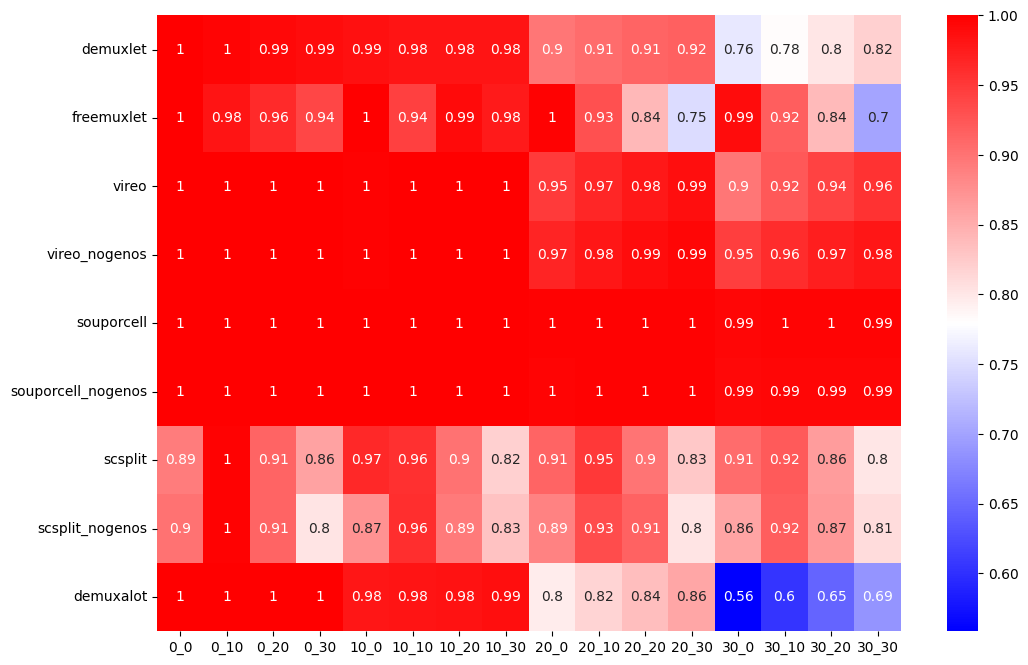

In [54]:
fig, axes = plt.subplots(1, figsize=(12, 8))

sns.heatmap(doub_gex_drop_acc, annot=True, cmap='bwr')

<Axes: >

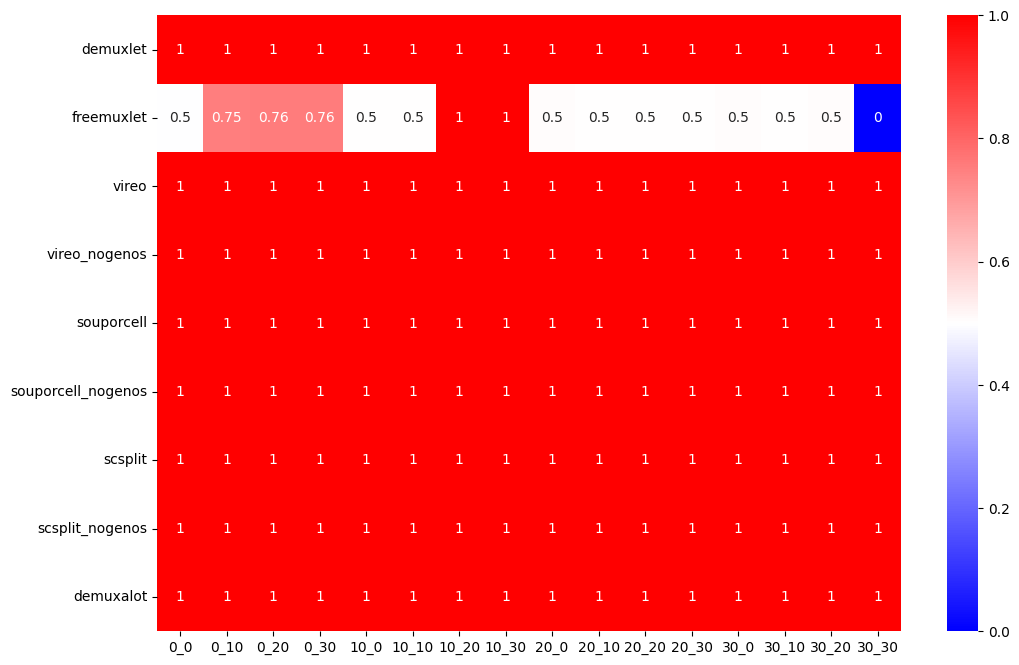

In [55]:
fig, axes = plt.subplots(1, figsize=(12, 8))

sns.heatmap(doub_gex_donor_acc, annot=True, cmap='bwr')

<Axes: >

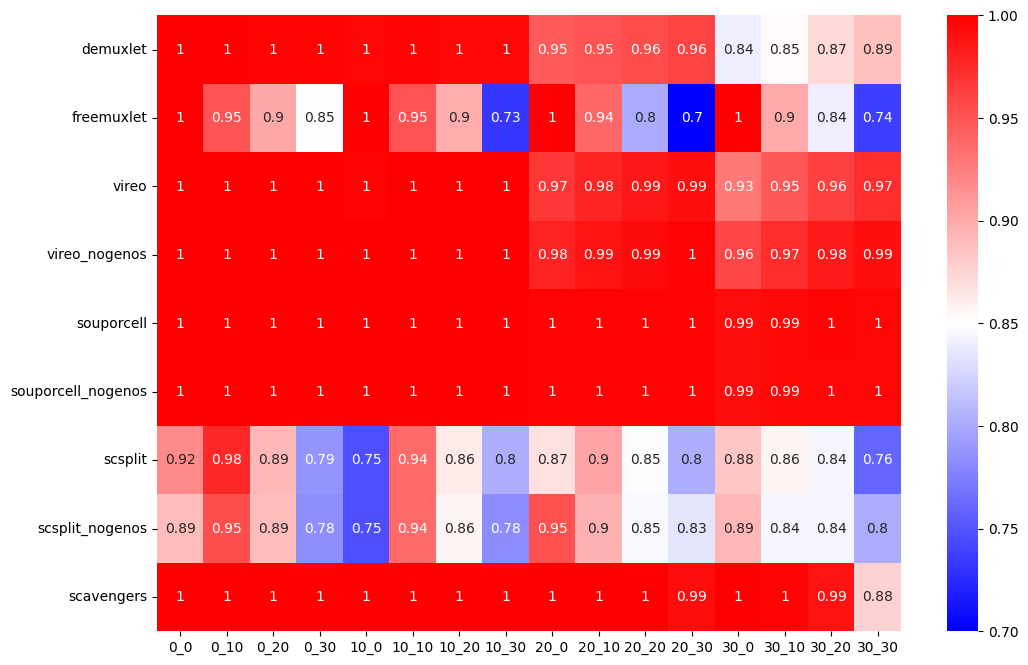

In [56]:
fig, axes = plt.subplots(1, figsize=(12, 8))

sns.heatmap(doub_atac_drop_acc, annot=True, cmap='bwr')

<Axes: >

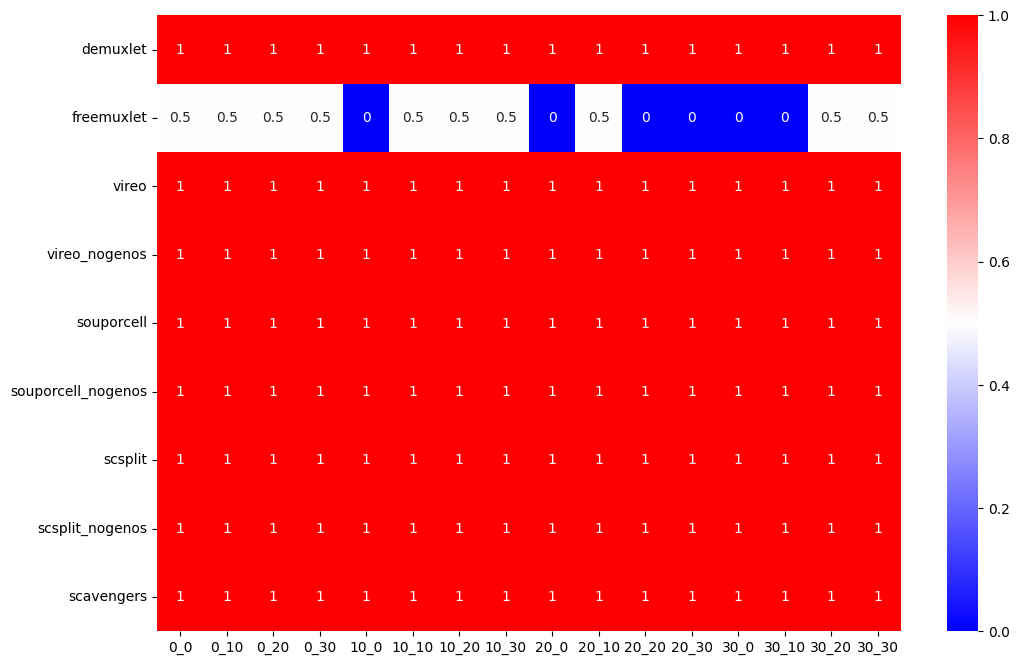

In [57]:
fig, axes = plt.subplots(1, figsize=(12, 8))

sns.heatmap(doub_atac_donor_acc, annot=True, cmap='bwr')

<Axes: >

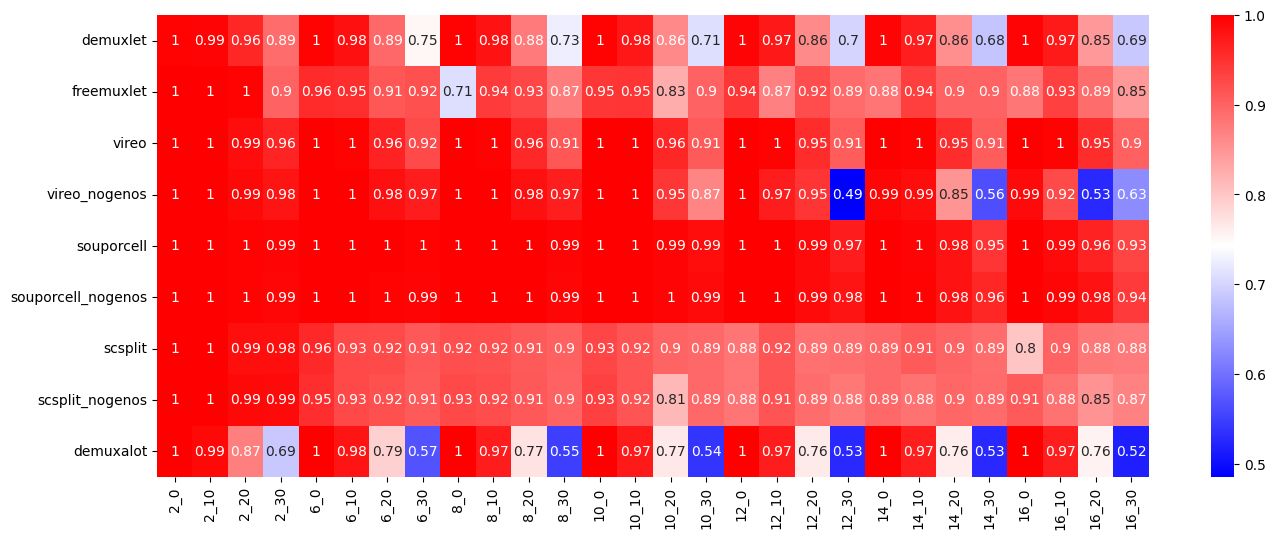

In [58]:
fig, axes = plt.subplots(1, figsize=(16, 6))

sns.heatmap(mux_gex_drop_acc, annot=True, cmap='bwr')

<Axes: >

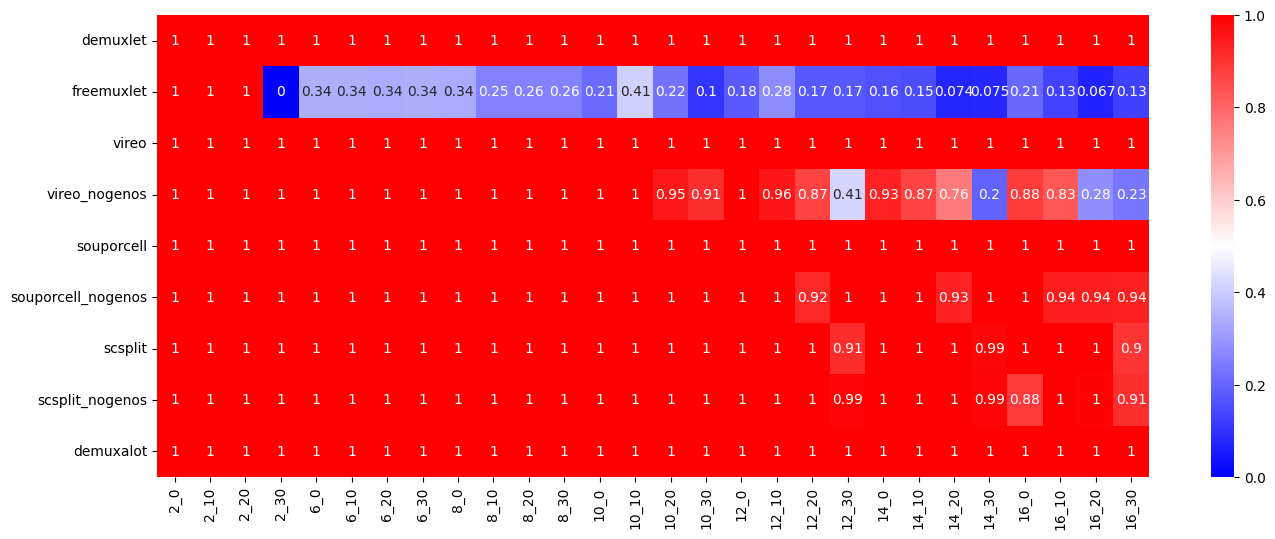

In [59]:
fig, axes = plt.subplots(1, figsize=(16, 6))

sns.heatmap(mux_gex_donor_acc, annot=True, cmap='bwr')

<Axes: >

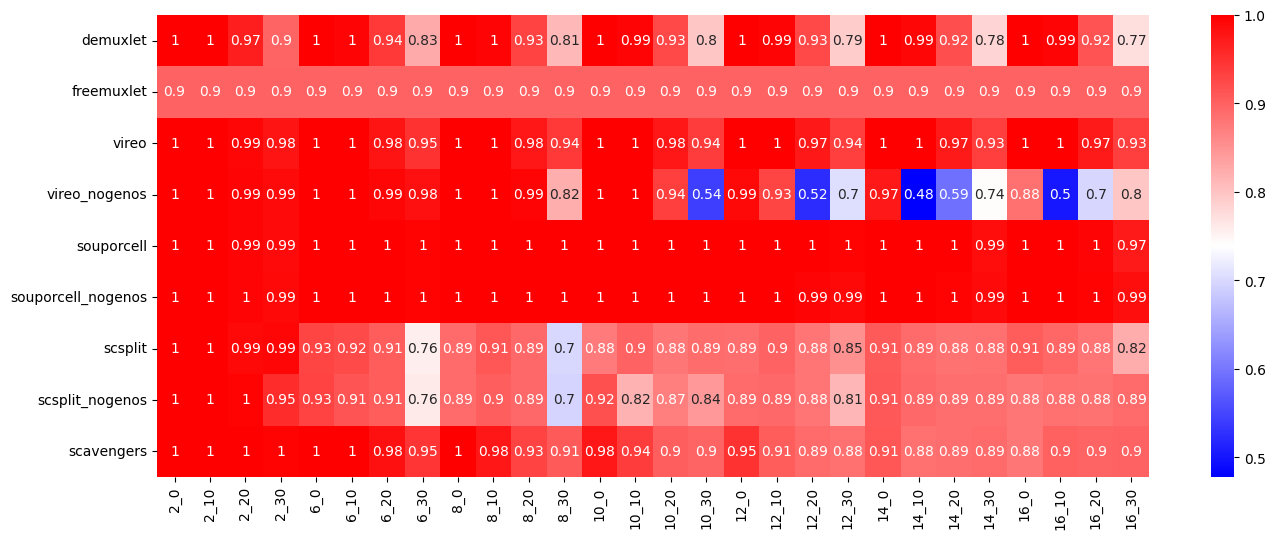

In [60]:
fig, axes = plt.subplots(1, figsize=(16, 6))

sns.heatmap(mux_atac_drop_acc, annot=True, cmap='bwr')

<Axes: >

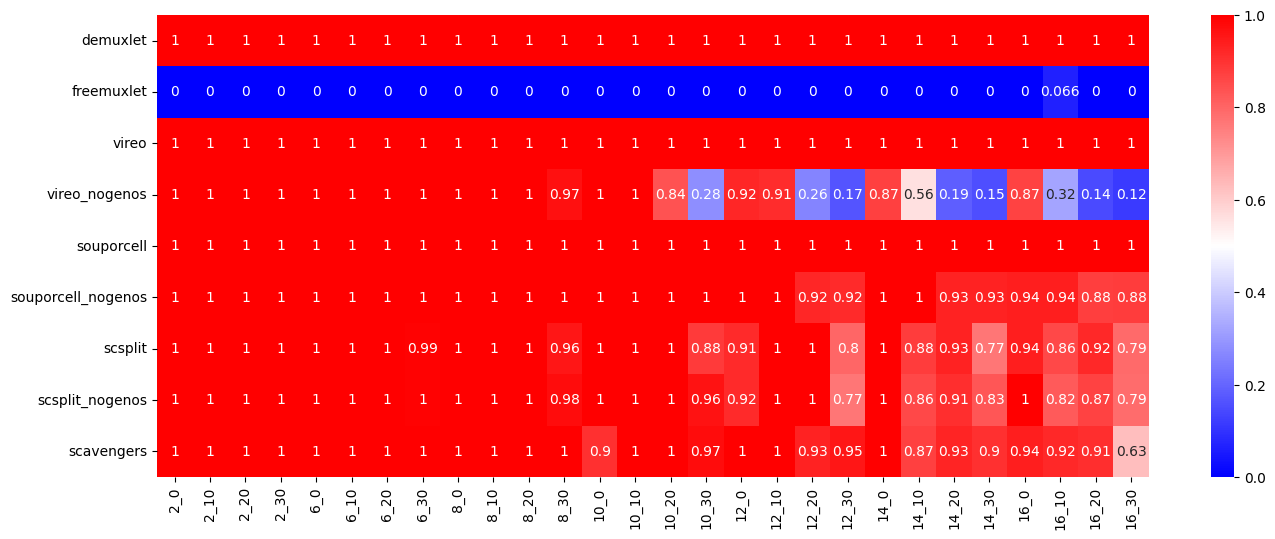

In [61]:
fig, axes = plt.subplots(1, figsize=(16, 6))

sns.heatmap(mux_atac_donor_acc, annot=True, cmap='bwr')

In [33]:
doub_gex_drop_acc.to_csv(f'{projdir}/csv/final_figures/figure2/doub_gex_drop_acc.csv.gz',
                         sep='\t', header=True, index=True)

doub_gex_donor_acc.to_csv(f'{projdir}/csv/final_figures/figure2/doub_gex_donor_acc.csv.gz',
                         sep='\t', header=True, index=True)

doub_atac_drop_acc.to_csv(f'{projdir}/csv/final_figures/figure2/doub_atac_drop_acc.csv.gz',
                         sep='\t', header=True, index=True)

doub_atac_donor_acc.to_csv(f'{projdir}/csv/final_figures/figure2/doub_atac_donor_acc.csv.gz',
                         sep='\t', header=True, index=True)

In [34]:
mux_gex_drop_acc.to_csv(f'{projdir}/csv/final_figures/figure2/mux_gex_drop_acc.csv.gz',
                         sep='\t', header=True, index=True)

mux_gex_donor_acc.to_csv(f'{projdir}/csv/final_figures/figure2/mux_gex_donor_acc.csv.gz',
                         sep='\t', header=True, index=True)

mux_atac_drop_acc.to_csv(f'{projdir}/csv/final_figures/figure2/mux_atac_drop_acc.csv.gz',
                         sep='\t', header=True, index=True)

mux_atac_donor_acc.to_csv(f'{projdir}/csv/final_figures/figure2/mux_atac_donor_acc.csv.gz',
                         sep='\t', header=True, index=True)